In [87]:
import music21 as m21
#import json
import ast
import os
import random

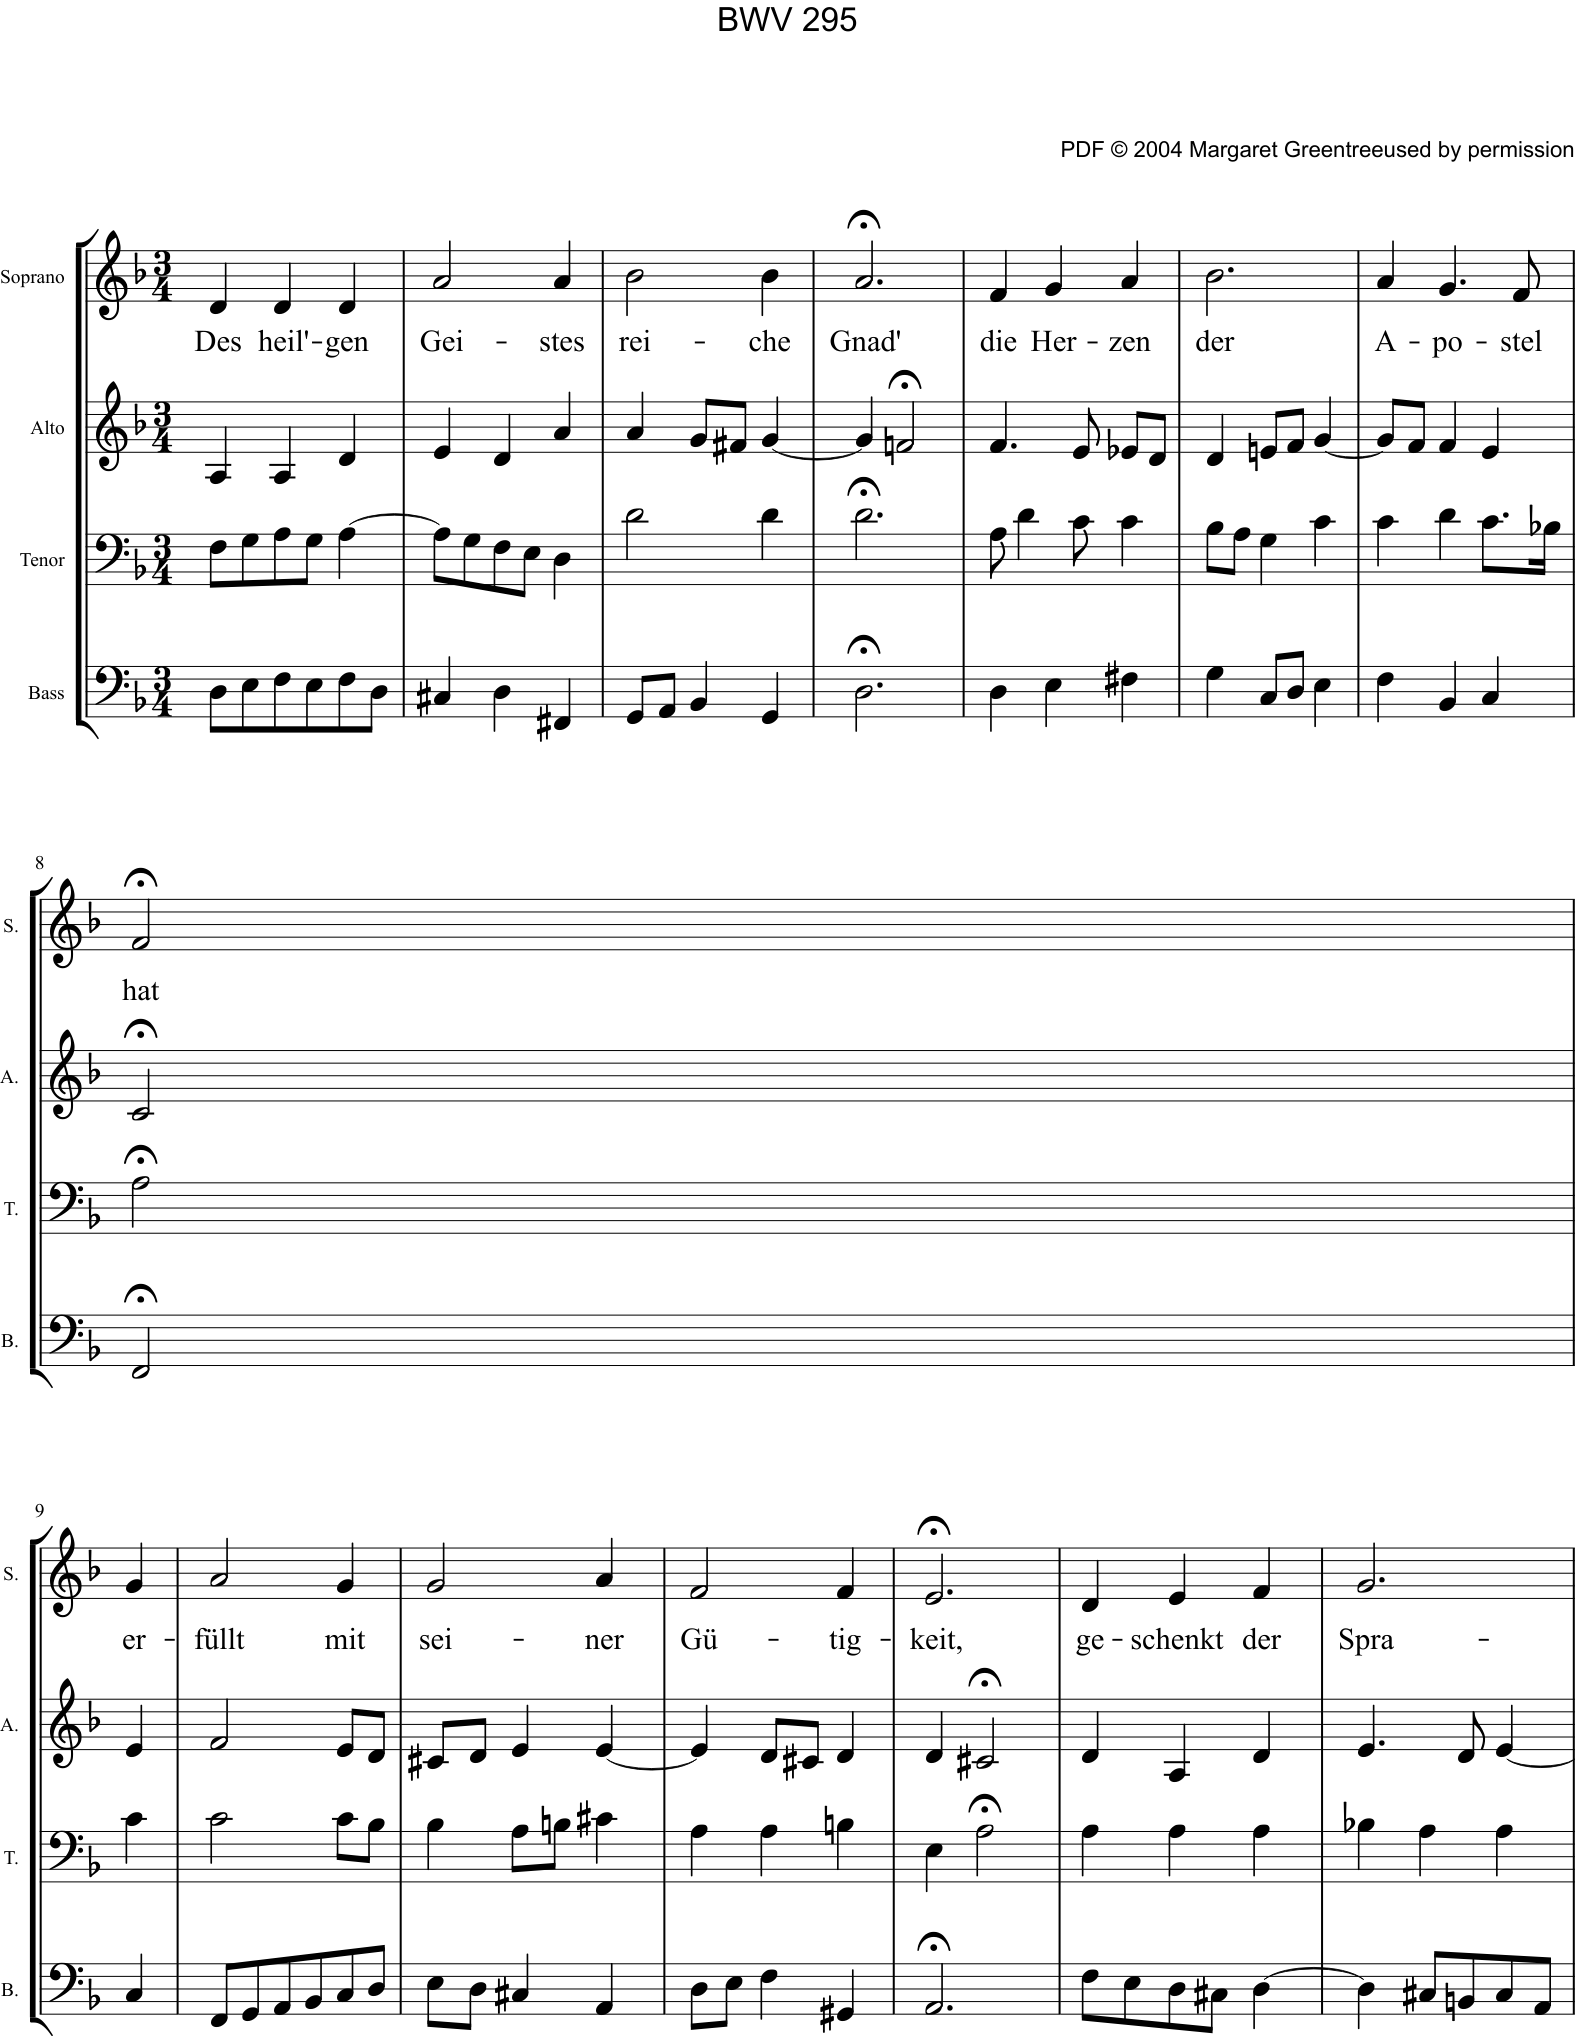

In [88]:
bwv295 = m21.corpus.parse('bach/bwv295')
bwv295.show()

In [89]:
bwv295.show('midi')

In [58]:
PATH='data/music/'

In [46]:
def convert_to_mldata_3(work):
    k = work.analyze('key')
    i = m21.interval.Interval(k.tonic, m21.pitch.Pitch('C'))
    wrk = work.flat.transpose(i)
    
    lst = []
    for i in range(int(wrk.highestTime*4)):
        lst.append([])
    for n in wrk.notes:
        off = int(n.offset*4)
        d = n.duration
        dur = int(d.quarterLength*4)
        for pit in n.pitches:
            name = pit.nameWithOctave
            lst[off].append([name,int(d.quarterLength*4)]) 
        l = 0
        ss = ""
        for i in range(len(lst)):
            i_len = len(lst[i])
            if i_len>0:
                ss+="[ "
                indexes = range(i_len)
                shuffled = random.sample(indexes, len(indexes))
                #shuffled = range(i_len)
                trace = 0
                for j in shuffled:
                    ss+=f"{lst[i][j][0]}@{lst[i][j][1]} "
                    if trace == i_len-1:
                        ss+="] "
                    else:
                        ss+=", "
                        trace += 1
            else:
                ss+=f"[ ] "
    return l, ss

In [ ]:
#working OK!
def convert_to_mldata_4(work):
    k = work.analyze('key')
    i = m21.interval.Interval(k.tonic, m21.pitch.Pitch('C'))
    wrk = work.flat.transpose(i)
    
    lst = []
    for i in range(int(wrk.highestTime*4)):
        lst.append([])
    for n in wrk.notes:
        off = int(n.offset*4)
        d = n.duration
        dur = int(d.quarterLength*4)
        for pit in n.pitches:
            name = pit.nameWithOctave
            lst[off].append([name,int(d.quarterLength*4)]) 
        l = 0
        ss = ""
        for i in range(len(lst)):
            i_len = len(lst[i])
            if i_len>0:
                ss+="[ "
                indexes = range(i_len)
                shuffled = random.sample(indexes, len(indexes))
                #shuffled = range(i_len)
                trace = 0
                for j in shuffled:
                    ss+=f"{lst[i][j][0]}@{lst[i][j][1]} "
                    if trace == i_len-1:
                        ss+="] "
                    else:
                        ss+=", "
                        trace += 1
            else:
                ss+=f"[ ] "
    return l, ss

In [100]:
#test of deduplication!

def convert_to_mldata_5(work):
    k = work.analyze('key')
    i = m21.interval.Interval(k.tonic, m21.pitch.Pitch('C'))
    wrk = work.flat.transpose(i)
    
    lst = []
    for i in range(int(wrk.highestTime*4)):
        lst.append([])
    for n in wrk.notes:
        off = int(n.offset*4)
        d = n.duration
        dur = int(d.quarterLength*4)
        for pit in n.pitches:
            name = pit.nameWithOctave
            lst[off].append([name,int(d.quarterLength*4)]) 
        l = 0
        lst = list(set(lst))
        ss = ""
        for i in range(len(lst)):
            i_len = len(lst[i])
            if i_len>0:
                ss+="[ "
                indexes = range(i_len)
                shuffled = random.sample(indexes, len(indexes))
                #shuffled = range(i_len)
                trace = 0
                for j in shuffled:
                    ss+=f"{lst[i][j][0]}@{lst[i][j][1]} "
                    if trace == i_len-1:
                        ss+="] "
                    else:
                        ss+=", "
                        trace += 1
            else:
                ss+=f"[ ] "
    return l, ss

In [101]:
l, ss = convert_to_mldata_3(bwv295)

In [92]:
def convert_from_mldata_3(ss):
    
    ss = ss.replace("[ ] ", "X")
    ss = ss.replace("[ ", "[['")
    ss = ss.replace("] ", "]],")
    ss = ss.replace(" , ","],['")
    ss = ss.replace("@","', ")
    ss = ss.replace('X', "[],")
    ss = "["+ss+"[]]"
    
    lst = ast.literal_eval(ss)
    
    s1 = m21.stream.Stream()
    for i in range(len(lst)):
        for element in lst[i]:
            n = m21.note.Note()
            p = m21.pitch.Pitch(element[0])
            n.pitch = p
            n.quarterLength = int(element[1])/4
            offset = i/4
            s1.insert(offset, n)
            #print(f'{offset} {n.quarterLength} {n.pitch.midi}')
    return s1

In [93]:
st = convert_from_mldata_3(ss)

In [94]:
st

<music21.stream.Stream 0x7f5d4b22cb38>

In [102]:
ss

'[ C3@2 , C4@4 , E-3@2 , G3@4 ] [ ] [ F3@2 , D3@2 ] [ ] [ C4@4 , G3@4 , G3@2 , E-3@2 ] [ ] [ F3@2 , D3@2 ] [ ] [ C4@4 , E-3@2 , C4@4 , G3@4 ] [ ] [ C3@2 ] [ ] [ G4@8 , D4@4 , B2@4 , G3@2 ] [ ] [ F3@2 ] [ ] [ C4@4 , E-3@2 , C3@4 ] [ ] [ D3@2 ] [ ] [ G4@4 , G4@4 , C3@4 , E2@4 ] [ ] [ ] [ ] [ A-4@8 , F2@2 , G4@4 , C4@8 ] [ ] [ G2@2 ] [ ] [ A-2@4 , F4@2 ] [ ] [ E4@2 ] [ ] [ F2@4 , C4@4 , A-4@4 , F4@4 ] [ ] [ ] [ ] [ G4@12 , C3@12 , C4@12 , F4@4 ] [ ] [ ] [ ] [ E-4@8 ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ E-4@6 , C3@4 , G3@2 , E-4@4 ] [ ] [ C4@4 ] [ ] [ F4@4 , D3@4 ] [ ] [ B-3@2 , D4@2 ] [ ] [ E3@4 , B-3@4 , D-4@2 , G4@4 ] [ ] [ C4@2 ] [ ] [ A-3@2 , A-4@12 , F3@4 , C4@4 ] [ ] [ G3@2 ] [ ] [ F3@4 , D4@2 , B-2@2 ] [ ] [ C3@2 , E-4@2 ] [ ] [ B-3@4 , F4@4 , D3@4 ] [ ] [ ] [ ] [ E-3@4 , F4@2 , G4@4 , B-3@4 ] [ ] [ E-4@2 ] [ ] [ F4@6 , E-4@4 , C4@4 , A-2@4 ] [ ] [ ] [ ] [ B-3@3 , B-2@4 , D4@4 ] [ ] [ E-4@2 ] [ A-3@1 ] [ G3@8 , E-4@8 , E-2@8 , B-3@8 ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ B-2@4 , F4@4 , D4@4 , B

In [96]:
s1=convert_from_mldata_3(ss)

In [97]:
print(l, ss)

0 [ E-3@2 , G3@4 , C3@2 , C4@4 ] [ ] [ F3@2 , D3@2 ] [ ] [ G3@2 , C4@4 , E-3@2 , G3@4 ] [ ] [ D3@2 , F3@2 ] [ ] [ C4@4 , E-3@2 , C4@4 , G3@4 ] [ ] [ C3@2 ] [ ] [ D4@4 , G3@2 , G4@8 , B2@4 ] [ ] [ F3@2 ] [ ] [ C3@4 , C4@4 , E-3@2 ] [ ] [ D3@2 ] [ ] [ G4@4 , C3@4 , G4@4 , E2@4 ] [ ] [ ] [ ] [ A-4@8 , G4@4 , C4@8 , F2@2 ] [ ] [ G2@2 ] [ ] [ F4@2 , A-2@4 ] [ ] [ E4@2 ] [ ] [ A-4@4 , F2@4 , F4@4 , C4@4 ] [ ] [ ] [ ] [ G4@12 , F4@4 , C3@12 , C4@12 ] [ ] [ ] [ ] [ E-4@8 ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ E-4@4 , G3@2 , E-4@6 , C3@4 ] [ ] [ C4@4 ] [ ] [ D3@4 , F4@4 ] [ ] [ D4@2 , B-3@2 ] [ ] [ E3@4 , B-3@4 , D-4@2 , G4@4 ] [ ] [ C4@2 ] [ ] [ A-3@2 , C4@4 , A-4@12 , F3@4 ] [ ] [ G3@2 ] [ ] [ D4@2 , B-2@2 , F3@4 ] [ ] [ E-4@2 , C3@2 ] [ ] [ D3@4 , B-3@4 , F4@4 ] [ ] [ ] [ ] [ E-3@4 , G4@4 , F4@2 , B-3@4 ] [ ] [ E-4@2 ] [ ] [ C4@4 , F4@6 , E-4@4 , A-2@4 ] [ ] [ ] [ ] [ B-2@4 , D4@4 , B-3@3 ] [ ] [ E-4@2 ] [ A-3@1 ] [ E-2@8 , E-4@8 , G3@8 , B-3@8 ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ D4@4 , B-2@4 , F4@4 , 

In [98]:
ss.show()

AttributeError: 'str' object has no attribute 'show'

In [99]:
s1.show("midi")

In [104]:
aug = 3
paths = m21.corpus.getComposer('bach','xml')
for path in paths:
    fname = os.path.basename(path)
    re, ext = os.path.splitext(fname)
    s1 = m21.corpus.parse(path)
    for i in range(aug):
        fname = PATH+re+f"_perm{i}_flat_trans.tst"
        l, ss = convert_to_mldata_3(s1)
        with open(fname, 'w') as file:
            file.write(ss)
        print(re, l)

bwv1.6 0
bwv1.6 0
bwv1.6 0
bwv10.7 0
bwv10.7 0
bwv10.7 0
bwv101.7 0
bwv101.7 0
bwv101.7 0
bwv102.7 0
bwv102.7 0
bwv102.7 0
bwv103.6 0
bwv103.6 0
bwv103.6 0
bwv104.6 0
bwv104.6 0
bwv104.6 0
bwv108.6 0
bwv108.6 0
bwv108.6 0
bwv11.6 0
bwv11.6 0
bwv11.6 0
bwv110.7 0
bwv110.7 0
bwv110.7 0
bwv111.6 0
bwv111.6 0
bwv111.6 0
bwv112.5-sc 0
bwv112.5-sc 0
bwv112.5-sc 0
bwv112.5 0
bwv112.5 0
bwv112.5 0
bwv113.8 0
bwv113.8 0
bwv113.8 0
bwv114.7 0
bwv114.7 0
bwv114.7 0
bwv115.6 0
bwv115.6 0
bwv115.6 0
bwv116.6 0
bwv116.6 0
bwv116.6 0
bwv117.4 0
bwv117.4 0
bwv117.4 0
bwv119.9 0
bwv119.9 0
bwv119.9 0
bwv12.7 0
bwv12.7 0
bwv12.7 0
bwv120.6 0
bwv120.6 0
bwv120.6 0
bwv120.8-a 0
bwv120.8-a 0
bwv120.8-a 0
bwv121.6 0
bwv121.6 0
bwv121.6 0
bwv122.6 0
bwv122.6 0
bwv122.6 0
bwv123.6 0
bwv123.6 0
bwv123.6 0
bwv124.6 0
bwv124.6 0
bwv124.6 0
bwv125.6 0
bwv125.6 0
bwv125.6 0
bwv126.6 0
bwv126.6 0
bwv126.6 0
bwv127.5 0
bwv127.5 0
bwv127.5 0
bwv128.5 0
bwv128.5 0
bwv128.5 0
bwv13.6 0
bwv13.6 0
bwv13.6 0
bwv130.6 0
bw

bwv359 0
bwv36.4-2 0
bwv36.4-2 0
bwv36.4-2 0
bwv36.8-2 0
bwv36.8-2 0
bwv36.8-2 0
bwv360 0
bwv360 0
bwv360 0
bwv361 0
bwv361 0
bwv361 0
bwv362 0
bwv362 0
bwv362 0
bwv363 0
bwv363 0
bwv363 0
bwv364 0
bwv364 0
bwv364 0
bwv365 0
bwv365 0
bwv365 0
bwv366 0
bwv366 0
bwv366 0
bwv367 0
bwv367 0
bwv367 0
bwv368 0
bwv368 0
bwv368 0
bwv369 0
bwv369 0
bwv369 0
bwv37.6 0
bwv37.6 0
bwv37.6 0
bwv370 0
bwv370 0
bwv370 0
bwv371 0
bwv371 0
bwv371 0
bwv372 0
bwv372 0
bwv372 0
bwv373 0
bwv373 0
bwv373 0
bwv374 0
bwv374 0
bwv374 0
bwv375 0
bwv375 0
bwv375 0
bwv376 0
bwv376 0
bwv376 0
bwv377 0
bwv377 0
bwv377 0
bwv378 0
bwv378 0
bwv378 0
bwv379 0
bwv379 0
bwv379 0
bwv38.6 0
bwv38.6 0
bwv38.6 0
bwv380 0
bwv380 0
bwv380 0
bwv381 0
bwv381 0
bwv381 0
bwv382 0
bwv382 0
bwv382 0
bwv383 0
bwv383 0
bwv383 0
bwv384 0
bwv384 0
bwv384 0
bwv385 0
bwv385 0
bwv385 0
bwv386 0
bwv386 0
bwv386 0
bwv387 0
bwv387 0
bwv387 0
bwv388 0
bwv388 0
bwv388 0
bwv389 0
bwv389 0
bwv389 0
bwv39.7 0
bwv39.7 0
bwv39.7 0
bwv390 0
bwv390 0
b

In [317]:
fname = PATH+"train/bwv1.6_flatten_transposed.txt"
with open(fname, 'r') as file:
    ss = file.read()

In [77]:
paths = m21.corpus.getComposer('monteverdi','xml')

In [78]:
paths

[PosixPath('/home/krzysztof/fastai/lib/python3.6/site-packages/music21/corpus/monteverdi/madrigal.3.1.mxl'),
 PosixPath('/home/krzysztof/fastai/lib/python3.6/site-packages/music21/corpus/monteverdi/madrigal.3.10.mxl'),
 PosixPath('/home/krzysztof/fastai/lib/python3.6/site-packages/music21/corpus/monteverdi/madrigal.3.11.mxl'),
 PosixPath('/home/krzysztof/fastai/lib/python3.6/site-packages/music21/corpus/monteverdi/madrigal.3.12.mxl'),
 PosixPath('/home/krzysztof/fastai/lib/python3.6/site-packages/music21/corpus/monteverdi/madrigal.3.13.mxl'),
 PosixPath('/home/krzysztof/fastai/lib/python3.6/site-packages/music21/corpus/monteverdi/madrigal.3.14.mxl'),
 PosixPath('/home/krzysztof/fastai/lib/python3.6/site-packages/music21/corpus/monteverdi/madrigal.3.15.mxl'),
 PosixPath('/home/krzysztof/fastai/lib/python3.6/site-packages/music21/corpus/monteverdi/madrigal.3.16.mxl'),
 PosixPath('/home/krzysztof/fastai/lib/python3.6/site-packages/music21/corpus/monteverdi/madrigal.3.17.mxl'),
 PosixPath(

In [80]:
m31.show('midi')

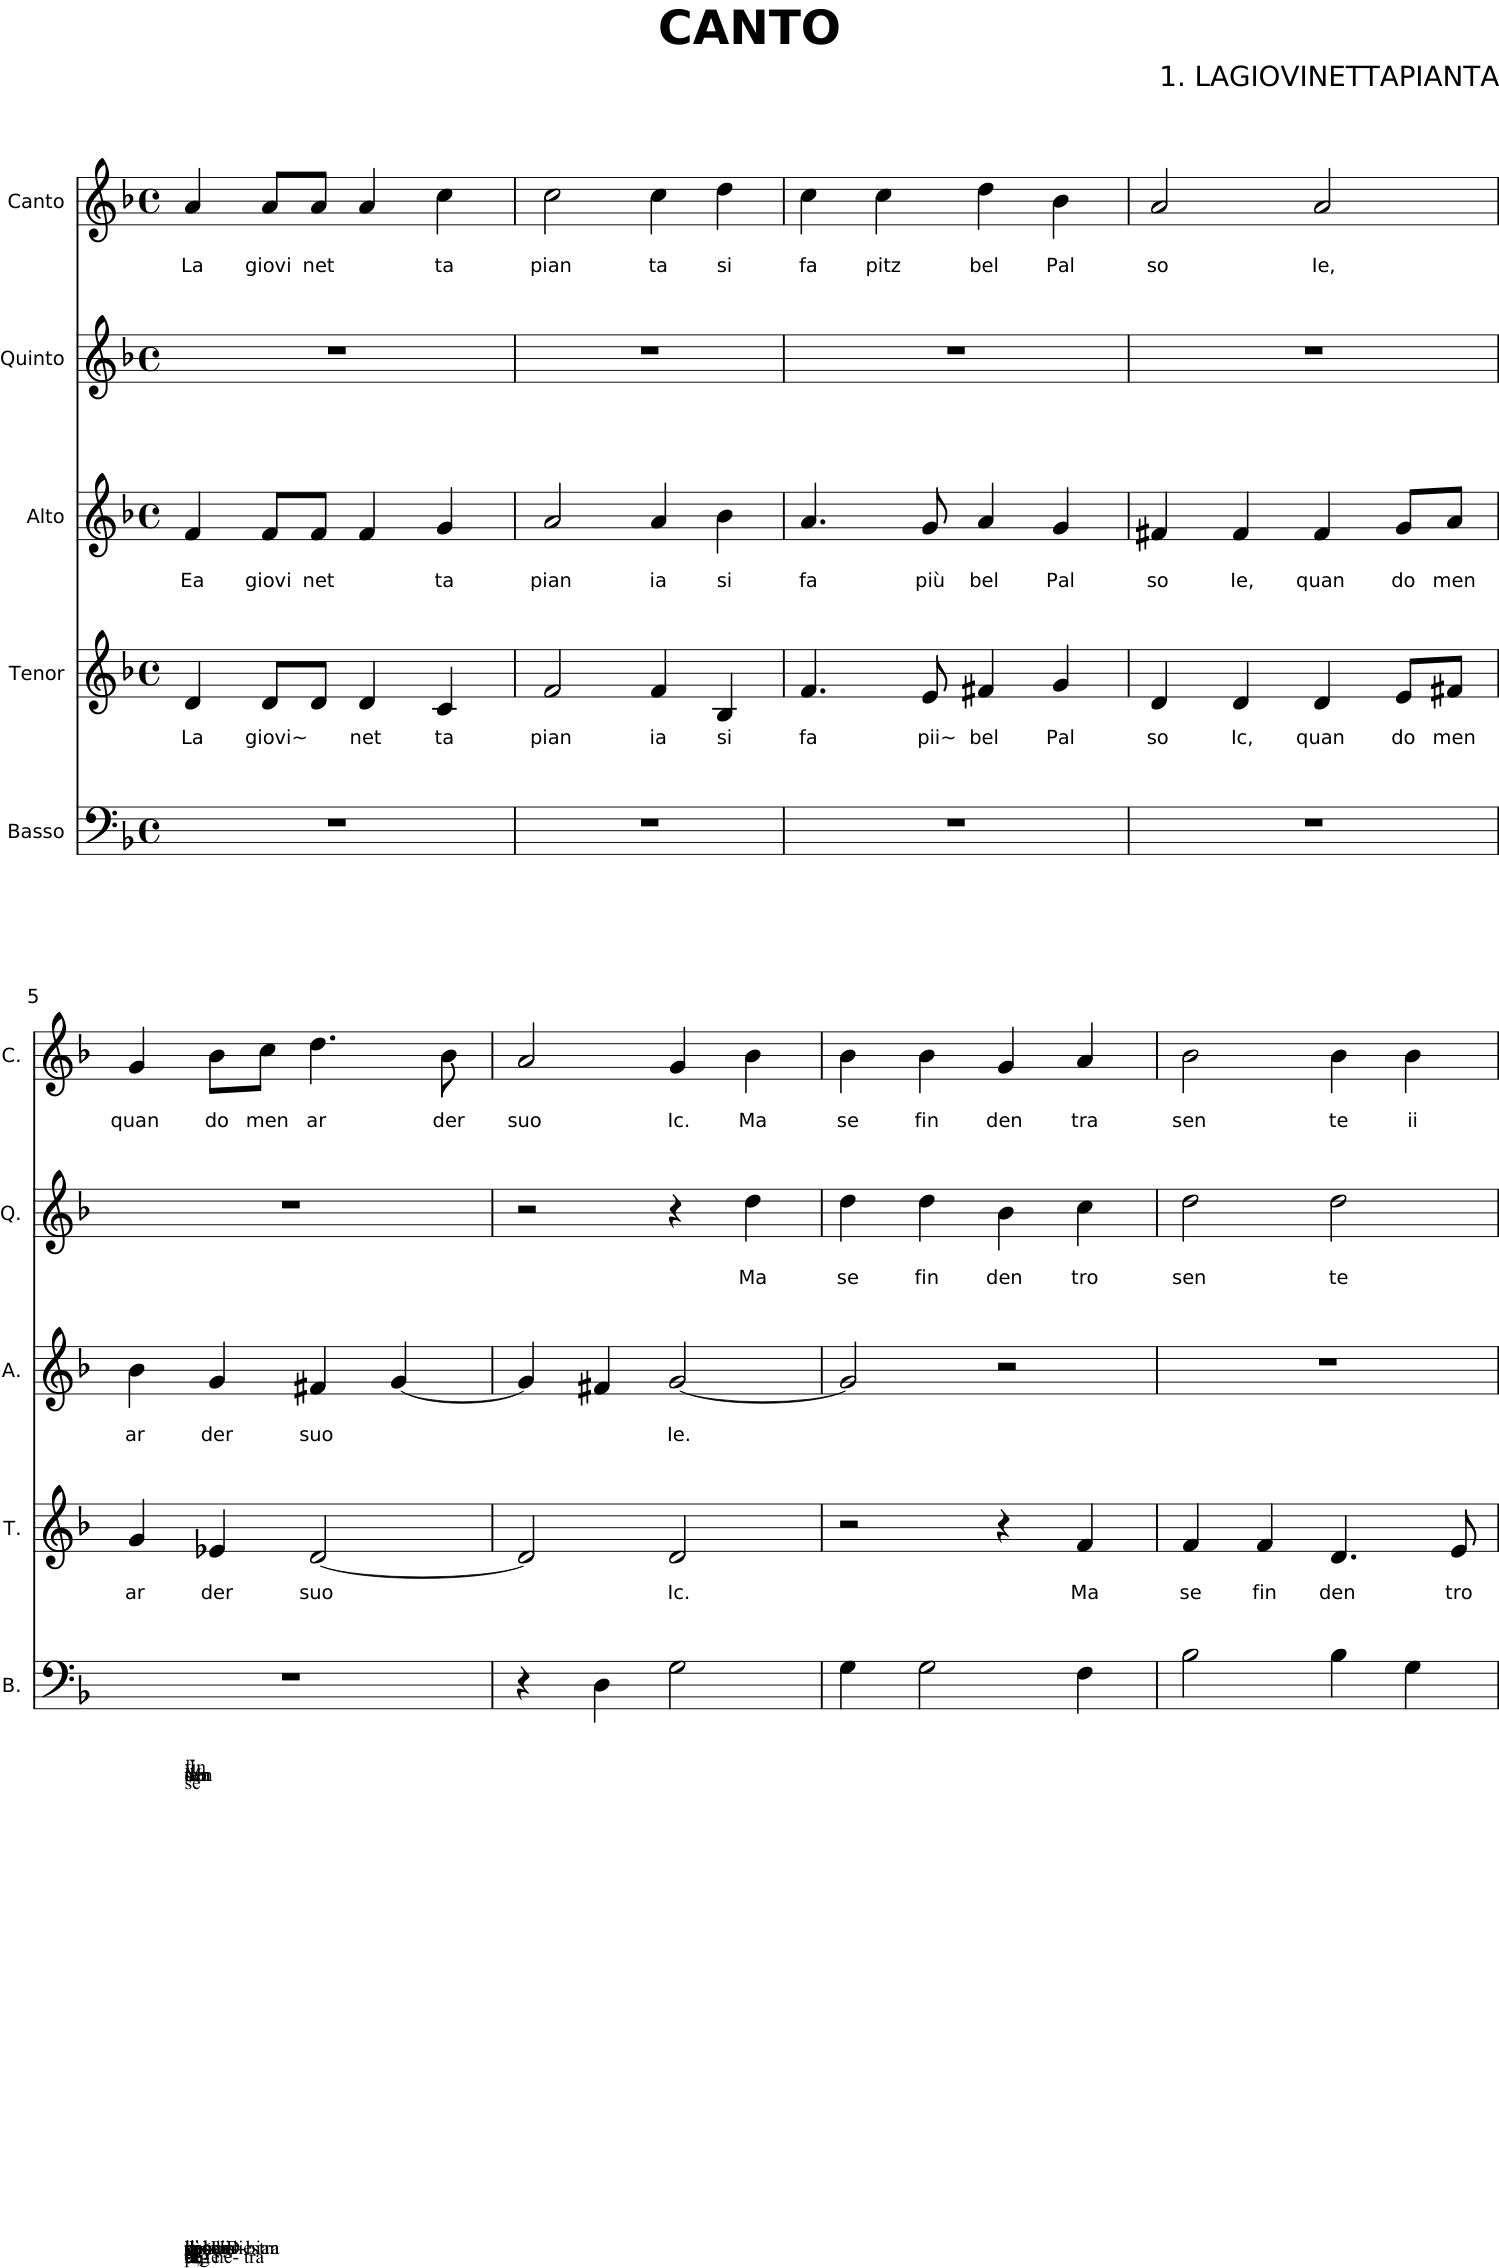

In [79]:
m31 = m21.corpus.parse('monteverdi/madrigal.3.1.mxl')
m31.show()

In [81]:
paths = m21.corpus.getComposer('monteverdi','xml')
for path in paths:
    fname = os.path.basename(path)
    re, ext = os.path.splitext(fname)
    fname = PATH+re+"_test.txt"
    s1 = m21.corpus.parse(path)
    l, ss = convert_to_mldata_3(s1)
    with open(fname, 'w') as file:
        file.write(ss)

KeyboardInterrupt: 

In [82]:
beginning="""[ G3@8 ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ G3@4 ] [ ] [ ] [ ] [ G3@4 ] [ ] [ ] [ ] [ G3@4 , D5@8 ] [ ] [ ] [ ] [ G3@4 ] [ ] [ ] [ ] [ D5@4 , B-3@8 ] [ ] [ ] [ ] [ D5@4 ] [ ] [ ] [ ] [ D5@4 ] [ ] [ ] [ ] [ D3@4 , D5@4 ] [ ] [ ] [ ] [ D3@4 , F5@8 ] [ ] [ ] [ ] [ D3@4 ] [ ] [ ] [ ] [ D3@8 ] [ ] [ ] [ ] [ A4@4 ] [ ] [ ] [ ] [ A4@4 , D3@4 ] [ ] [ ] [ ] [ D3@4 , A4@4 ] [ ] [ ] [ ] [ D3@2 , A4@8 ] [ ] [ D3@2 ] [ ] [ D3@4 ] [ ] [ ] [ ] [ C3@4 , A4@4 ] [ ] [ ] [ ] [ A4@4 , C3@4 ] [ ] [ ] [ ] [ C3@4 , A4@2 ] [ ] [ A4@2 ] [ ] [ C3@4 , A4@4 ] [ ] [ ] [ ] [ G4@4 , C3@4 ] [ ] [ ] [ ] [ G4@4 , C3@4 ] [ ] [ ] [ ] """
#beginning="[ B-2@16 , D3@16 , B-1@16 , F2@16 ] [ ] [ ] [ ] [ ] [ ] [ F3@2 ] [ ] [ G3@2 ] [ ] [ F3@2 ] [ ] [ ] [ ] [ F3@1 ] [ F3@0 ] [ C4@2 , B-2@16 , D3@16 , B-1@16 , F2@16 ] [ ] [ B-3@2 ] [ ] [ ] [ ] [ B-3@1 ] [ B-3@1 ] [ G3@4 ] [ ] [ ] [ ] [ C4@2 ] [ ] [ D4@2 ] [ ] [ D4@2 , C3@16 , D3@16 , A1@16 , F#2@16 ] [ ] [ F#3@2 ] [ ] [ ] [ ] [ F#3@2 ] [ ] [ G3@2 ] [ ] [ F#3@2 ] [ ] [ F#3@2 ] [ ] [ G3@2 ] [ ] [ A3@2 , C3@4 , D3@4 , F#1@4 , F#2@4 ] [ ] [ ] [ A3@1 ] [ B-3@2 ] [ ] [ C4@2 ] [ ] [ C4@2 ] [ ] [ B-3@2 ] [ ] [ B-2@4 , D3@4 , G1@4 , G2@4 ] [ ] [ G3@2 ] [ ] [ B3@2 , G2@8 , B2@8 , D3@8 , F1@8 , F2@8 ] [ ] [ ] [ B3@1 ] [ C4@2 ] [ ] [ D4@2 ] [ ] [ D4@2 ] [ ] [ F3@2 ] [ ] [ ] [ ] [ ] [ ] [ A-3@4 , G2@8 , D3@8 , F3@8 , B0@8 , B1@8 ] "
prediction="[ F4@2 ] [ ] [ C4@2 ] [ ] [ D4@4 , D2@4 , F4@4 ] [ ] [ ] [ ] [ F4@2 , D4@2 ] [ ] [ E4@2 , C4@2 ] [ ] [ D4@4 , F4@4 , B2@4 ] [ ] [ ] [ ] [ E4@2 , G4@2 ] [ ] [ D4@2 , F4@2 ] [ ] [ E4@2 , C4@2 , C3@4 ] [ ] [ D4@2 , F4@2 , G2@2 ] [ ] [ G4@8 , G2@2 , E4@8 ] [ ] [ G2@2 ] [ ] [ C2@2 , C3@4 , G3@8 , E4@8 , C4@8 , C2@2 ] [ ] [ C2@2 , G2@2 ] [ ] [ C2@2 , E4@4 , C4@4 ] [ ] [ C2@2 ] [ ] [ C2@2 , C4@8 , G4@8 , E4@8 , C3@8 , G4@4 , C3@8 , C2@2 ] [ ] [ G2@2 , C2@2 ] [ ] [ C2@2 , E4@4 , G4@4 ] [ ] [ C2@2 ] [ ] [ C2@2 , G4@8 , C3@8 , G4@8 , E4@8 , C4@8 , G4@4 , C2@2 ] [ ] [ G2@2 , C2@2 ] [ ] [ C2@2 , G4@4 , E4@4 ] [ ] [ C2@2 ] [ ] [ C2@2 , G4@8 , C3@8 , G4@8 , E4@8 , C4@8 , G4@4 , C2@2 ] [ ] [ G2@2 , C2@2 ] [ ] [ C2@2 , G4@4 , E4@4 ] [ ] [ C2@2 ] [ ] [ C2@2 , G4@8 , C3@8 , G4@8 , E4@8 , G4@4 , C4@8 , C2@2 ] [ ] [ G2@2 , C2@2 ] [ ] [ C2@2 , G4@4 , E4@4 ] [ ] [ C2@2 ] [ ] [ F2@4 , D4@8 , F2@4 , D4@8 , F4@8 , F4@8 , F4@8 , C2@2 ] [ ] [ C2@2 ] [ ] [ C2@2 , G4@4 , E4@4 ] [ ] [ C2@2 ] [ ] [ F2@4 , D4@8 , D4@8 , F4@8 , F2@4 , F4@8 , F2@2 , F4@8 , C3@8 ] [ ] [ G2@2 ] [ ] [ G2@2 , F4@2 , G2@2 ] [ ] [ C4@2 , G2@2 , E4@2 ] [ ] [ D4@8 , D4@8 , G2@2 , G2@4 , G2@8 , B3@4 , D4@4 , G2@4 ] [ ] [ G2@2 ] [ ] [ G2@2 , D4@4 , G2@2 , G3@4 ] [ ] [ G2@2 , G2@2 ] [ ] [ C4@8 , C3@4 , E4@4 , C3@4 , G3@8 , C3@4 , G3@8 , C2@2 ] [ ] [ E2@2 ] [ ] [ E4@4 , C2@2 , C4@4 , C3@4 ] [ ] [ C2@2 ] [ ] [ D4@8 , G3@8 , G2@2 , D4@8 , G4@8 , G2@4 , D4@8 , G2@2 ] [ ] [ G2@2 , G2@2 ] [ ] [ G2@2 , G3@4 , G2@2 ] [ ] [ G2@2 , B2@2 ] [ ] [ C3@4 , C3@4 , E4@4 , G3@8 , C2@2 , C4@8 , E4@8 , G3@8 ] [ ] [ G2@2 ] [ ] [ E4@2 , G2@2 , C4@2 ] [ ] [ D4@2 , G2@2 , E4@2 ] [ ] [ D4@8 , G2@4 , D4@8 , G2@2 , D4@8 , G2@4 , G3@4 , D4@4 ] [ ] [ G2@2 ] [ ] [ G2@2 , G2@4 , D4@4 , G3@4 ] [ ] [ G2@2 ] [ ] [ G3@8 , C4@8 , C3@4 , G2@2 , E4@4 , C4@8 , C3@4 , E4@8 ] [ ] [ G2@2 ] [ ] [ G2@2 , E4@2 , C4@2 ] [ ] [ G2@2 , E4@2 , C4@2 ] [ ] [ D4@8 , D4@8 , G2@4 , G2@4 , G3@8 , G2@4 , G2@2 , D4@8 ] [ ] [ G2@2 ] [ ] [ G2@2 , D4@4 , G2@4 , G3@4 ] [ ] [ G2@2 ] [ ] [ G3@8 , C4@8 , C3@4 , G2@2 , E4@8 , E4@4 , C3@4 , C3@4 ] [ ] [ G2@2 ] [ ] [ G2@2 , E4@2 , C4@2 ] [ ] [ G2@2 , E4@2 , C4@2 ] [ ] [ D4@8 , D4@8 , G2@4 , G2@4 , G2@4 , G3@8 , G2@2 , D4@8 ] [ ] [ G2@2 ] [ ] [ G2@2 , D4@4 , G2@4 , G3@4 ] [ ] [ G2@2 ] [ ] [ G3@8 , C4@8 , C3@4 , G2@2 , E4@8 , E4@4 , C3@4 , C3@4 ] [ ] [ G2@2 ] [ ] [ G2@2 , E4@2 , C4@2 ] [ ] [ G2@2 , E4@2 , C4@2 ] [ ] [ D4@8 , D4@8 , G2@4 , G2@4 , G2@4 , G3@8 , G2@2 , D4@8 ] [ ] [ G2@2 ] [ ] [ G2@2 , D4@4 , G2@4 , G3@4 ] [ ] [ G2@2 ] [ ] [ G3@8 , C4@8 , C3@4 , G2@2 , E4@8 , E4@4 , C3@4 , C3@4 ] [ ] [ G2@2 ] [ ] [ G2@2 , E4@2 , C4@2 ] [ ] [ G2@2 , E4@2 , C4@2 ] [ ] [ D4@8 , D4@8 , G2@4 , G2@4 , G2@4 , G3@8 , G2@2 , D4@8 ] [ ] [ G2@2 ] [ ] [ G2@2 , D4@4 , G2@4 , G3@4 ] [ ] [ G2@2 ] [ ] [ G3@8 , C4@8 , C3@4 , G2@2 , E4@8 , E4@4 , C3@4 , C3@4 ] [ ] [ G2@2 ] [ ] [ G2@2 , E4@2 , C4@2 ] [ ] [ G2@2 , E4@2 , C4@2 ] [ ] [ D4@8 , D4@8 , G2@4 , G2@4 , G2@4 , G3@8 , G2@2 , D4@8 ] [ ] [ G2@2 ] [ ] [ G2@2 , D4@4 , G2@4 , G3@4 ] [ ] [ G2@2 ] [ ] [ G3@8 , C4@8 , C3@4 , G2@2 , E4@8 ] "
ss = beginning+prediction

In [83]:
ss

'[ G3@8 ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ G3@4 ] [ ] [ ] [ ] [ G3@4 ] [ ] [ ] [ ] [ G3@4 , D5@8 ] [ ] [ ] [ ] [ G3@4 ] [ ] [ ] [ ] [ D5@4 , B-3@8 ] [ ] [ ] [ ] [ D5@4 ] [ ] [ ] [ ] [ D5@4 ] [ ] [ ] [ ] [ D3@4 , D5@4 ] [ ] [ ] [ ] [ D3@4 , F5@8 ] [ ] [ ] [ ] [ D3@4 ] [ ] [ ] [ ] [ D3@8 ] [ ] [ ] [ ] [ A4@4 ] [ ] [ ] [ ] [ A4@4 , D3@4 ] [ ] [ ] [ ] [ D3@4 , A4@4 ] [ ] [ ] [ ] [ D3@2 , A4@8 ] [ ] [ D3@2 ] [ ] [ D3@4 ] [ ] [ ] [ ] [ C3@4 , A4@4 ] [ ] [ ] [ ] [ A4@4 , C3@4 ] [ ] [ ] [ ] [ C3@4 , A4@2 ] [ ] [ A4@2 ] [ ] [ C3@4 , A4@4 ] [ ] [ ] [ ] [ G4@4 , C3@4 ] [ ] [ ] [ ] [ G4@4 , C3@4 ] [ ] [ ] [ ] [ F4@2 ] [ ] [ C4@2 ] [ ] [ D4@4 , D2@4 , F4@4 ] [ ] [ ] [ ] [ F4@2 , D4@2 ] [ ] [ E4@2 , C4@2 ] [ ] [ D4@4 , F4@4 , B2@4 ] [ ] [ ] [ ] [ E4@2 , G4@2 ] [ ] [ D4@2 , F4@2 ] [ ] [ E4@2 , C4@2 , C3@4 ] [ ] [ D4@2 , F4@2 , G2@2 ] [ ] [ G4@8 , G2@2 , E4@8 ] [ ] [ G2@2 ] [ ] [ C2@2 , C3@4 , G3@8 , E4@8 , C4@8 , C2@2 ] [ ] [ C2@2 , G2@2 ] [ ] [ C2@2 , E4@4 , C4@4 ] [ ] [ C2@2 ] [ ] [ C2@2 , C4@8 , G4@8

In [84]:
s1=convert_from_mldata_3(ss)

In [85]:
s1.show('midi')

In [64]:
lst = [[['B-2', '16 '], ['D3', '16 '], ['B-1', '16 '], ['F2', '16']], [], [], [], [], [], [['F3', '2']], [], [['G3', '2']], [], [['F3', '2']], [], [], [], [['F3', '1']], [['F3', '0']], [['C4', '2 '], ['B-2', '16 '], ['D3', '16 '], ['B-1', '16 '], ['F2', '16']], [], G3', '2']], [], [['C4', '2']], [], [['G3', '2']], [], [['C4', '2 '], ['G3', '4 '], ['D3', '4 '], ['G2', '4']], [], [['C4', '2']], [], [['C4', '4 '], ['G3', '4 '], ['D3', '4 '], ['G2', '4']], [], [], [], [['C4', '4 '], ['G3', '4 '], ['D3', '4 '], ['G2', '4']], [], [], []]

SyntaxError: invalid syntax (<ipython-input-64-be919dcd4834>, line 1)